# Exploring and Preparing data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('Online_Retail.xlsx')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.dropna()
df.shape

(541909, 8)

In [ ]:
# Total spendinfs per customerID
df['Amount'] = df['Quantity']*df['UnitPrice']
total_price = df.groupby('CustomerID')['Amount'].sum()
total_price = total_price.reset_index()
total_price.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
# Order frequency refers to how often a customer places an order with a company or a business.
freq = df.groupby('CustomerID')['InvoiceNo'].count()
freq = freq.reset_index()
freq.columns = ['CustomerID', 'Frequency']
freq.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [ ]:
final_df = pd.merge(total_price, freq, on='CustomerID', how='inner')
final_df.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [ ]:
from datetime import datetime
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)
max_date = max(df['InvoiceDate'])
df['Last_order'] = max_date - df.InvoiceDate
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Last_order
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [ ]:
Diff_date = df.groupby('CustomerID')['Last_order'].min()
Diff_date = Diff_date.reset_index()
Diff_date.head()

,CustomerID,Last_order
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [ ]:
Diff_date['Last_order'] = Diff_date['Last_order'].dt.days
Diff_date.head()

,CustomerID,Last_order
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [ ]:
final_df = pd.merge(final_df,Diff_date,on='CustomerID')
final_df.head()

,CustomerID,Amount,Frequency,Last_order
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


## Removing Outliers

<Axes: >

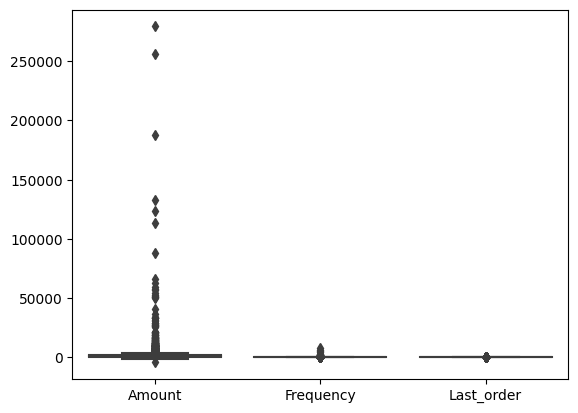

In [ ]:
import seaborn as sns
columns = ['Amount','Frequency','Last_order']
sns.boxplot(final_df[columns])

In [ ]:
Q1 = final_df['Amount'].quantile(0.25)
Q3 = final_df['Amount'].quantile(0.75)
IQR = Q3 - Q1
final_df = final_df[(final_df.Amount >= Q1 - 1.5*IQR) & (final_df.Amount <= Q3 + 1.5*IQR)]


Q1 = final_df['Frequency'].quantile(0.25)
Q3 = final_df['Frequency'].quantile(0.75)
IQR = Q3 - Q1
final_df = final_df[(final_df.Frequency >= Q1 - 1.5*IQR) & (final_df.Frequency <= Q3 + 1.5*IQR)]


Q1 = final_df['Last_order'].quantile(0.25)
Q3 = final_df['Last_order'].quantile(0.75)
IQR = Q3 - Q1
final_df = final_df[(final_df.Last_order >= Q1 - 1.5*IQR) & (final_df.Last_order <= Q3 + 1.5*IQR)]

<Axes: >

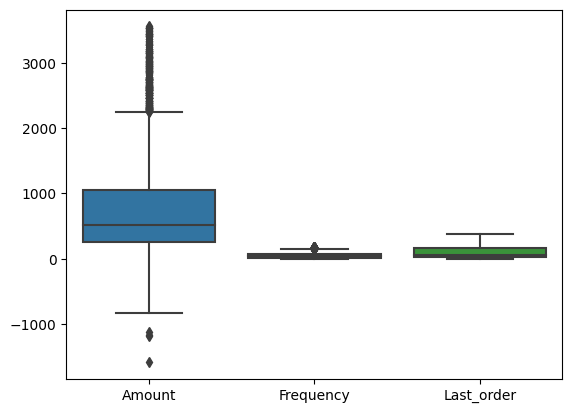

In [ ]:
columns = ['Amount','Frequency','Last_order']
sns.boxplot(final_df[columns])


## Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
columns = final_df[['Amount', 'Frequency', 'Last_order']]

st = StandardScaler()
final_scaled = st.fit_transform(columns)
final_scaled = pd.DataFrame(final_scaled)
final_scaled.columns = ['Amount', 'Frequency', 'Last_order']
final_scaled.head()

,Amount,Frequency,Last_order
0,-1.041614,-1.070949,2.136422
1,1.385298,-0.375498,-0.282050
2,1.331702,0.631707,-0.821629
3,-0.590055,-0.711233,1.982257
4,1.045238,1.159290,-0.657828


## Model building

In [ ]:
elbow = []
from sklearn.cluster import KMeans
for i in range(2,10) :
    kmeans= KMeans(n_clusters=i,random_state=42,n_init=10)
    kmeans.fit(final_scaled)
    elbow.append(kmeans.inertia_)



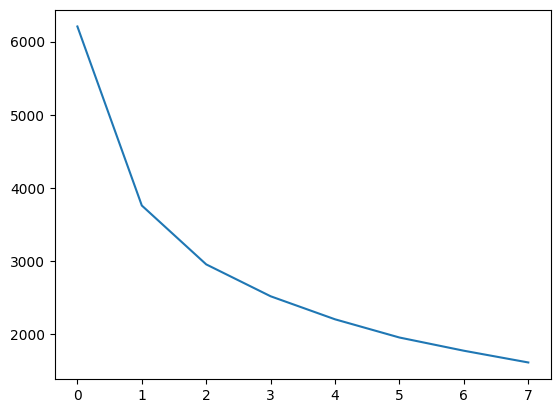

In [ ]:
plt.plot(elbow)


In [ ]:
from sklearn.metrics import silhouette_score


for num_clusters in range(2,10):

    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,n_init=10)
    kmeans.fit(final_scaled)

    cluster_labels = kmeans.labels_

    score = silhouette_score(final_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, score))

For n_clusters=2, the silhouette score is 0.42929467976639346
For n_clusters=3, the silhouette score is 0.43933529055238923
For n_clusters=4, the silhouette score is 0.40851721359807264
For n_clusters=5, the silhouette score is 0.3891371946885664
For n_clusters=6, the silhouette score is 0.35693545614986955
For n_clusters=7, the silhouette score is 0.3322402565849888
For n_clusters=8, the silhouette score is 0.34115209918940537
For n_clusters=9, the silhouette score is 0.34837928113306754


In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=50,n_init=10)
kmeans.fit(final_scaled)


KMeans(max_iter=50, n_clusters=3, n_init=10)

In [ ]:
final_df['Clusters'] = kmeans.labels_
final_df.head()

,CustomerID,Amount,Frequency,Last_order,Clusters
0,12346.0,0.00,2,325,2
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2
5,12352.0,1545.41,95,35,0


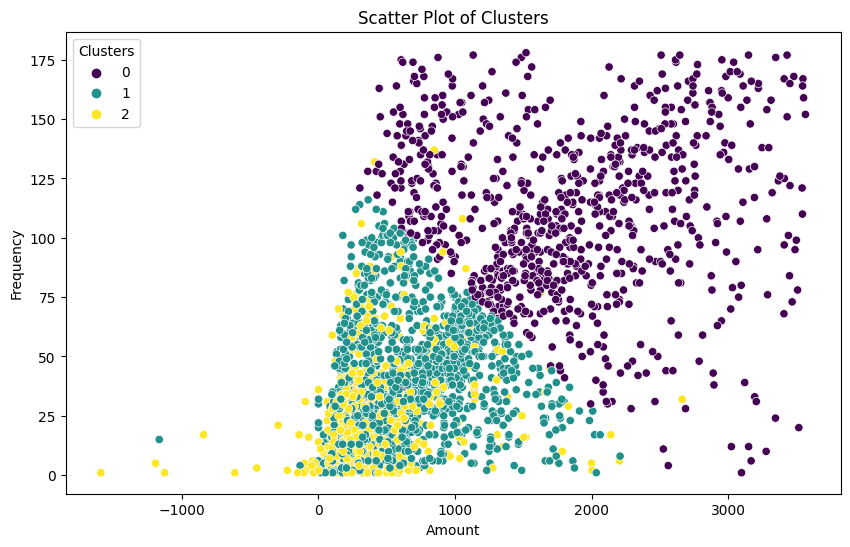

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Amount', y='Frequency', hue='Clusters', data=final_df, palette='viridis')
plt.title('Scatter Plot of Clusters')
plt.show()

<Axes: xlabel='Clusters', ylabel='Amount'>

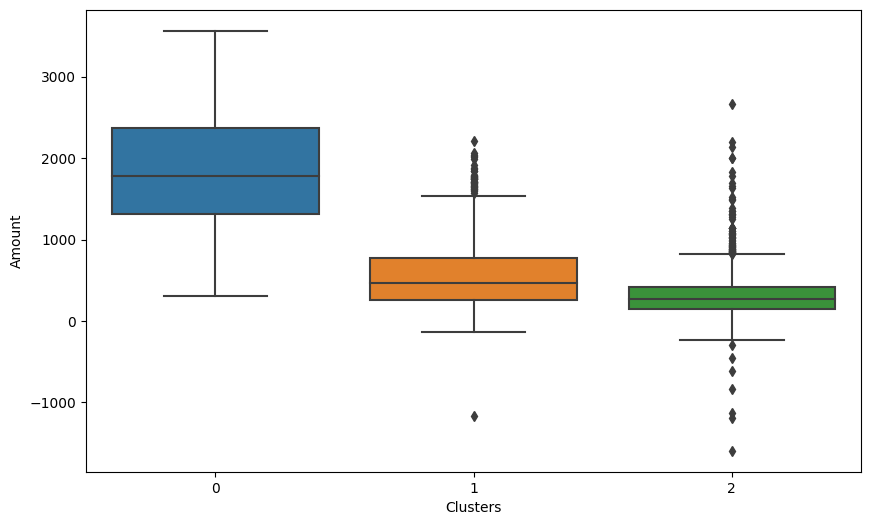

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Clusters', y='Amount', data=final_df)


<Axes: xlabel='Clusters', ylabel='Frequency'>

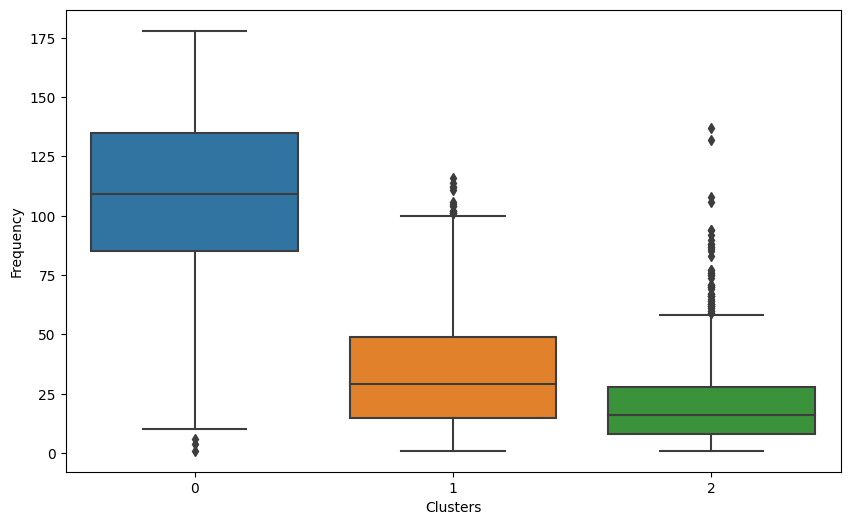

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Clusters', y='Frequency', data=final_df)


In [ ]:
def get_recommendations(cluster):
    recommendations = {
        0: "Exclusive discounts for our most loyal customers!",
        1: "Check out our latest arrivals in your favorite category!",
        2: "Enjoy special offers on budget-friendly items."
    }
    return recommendations.get(cluster)

# Step 3: Apply recommendations to each customer in the DataFrame
final_df['Recommendation'] = final_df['Clusters'].apply(get_recommendations)

In [ ]:
final_df

,CustomerID,Amount,Frequency,Last_order,Clusters,Recommendation
0,12346.0,0.00,2,325,2,Enjoy special offers on budget-friendly items.
2,12348.0,1797.24,31,74,1,Check out our latest arrivals in your favorite...
3,12349.0,1757.55,73,18,0,Exclusive discounts for our most loyal customers!
4,12350.0,334.40,17,309,2,Enjoy special offers on budget-friendly items.
5,12352.0,1545.41,95,35,0,Exclusive discounts for our most loyal customers!
...,...,...,...,...,...,...
4366,18278.0,173.90,9,73,1,Check out our latest arrivals in your favorite...
4367,18280.0,180.60,10,277,2,Enjoy special offers on budget-friendly items.
4368,18281.0,80.82,7,180,2,Enjoy special offers on budget-friendly items.
4369,18282.0,176.60,13,7,1,Check out our latest arrivals in your favorite...
